## Inteligență Artificială: Sokoban

In [28]:
import os
import glob
from sokoban import Map, save_images, create_gif
from sokoban.moves import UP, DOWN, LEFT, RIGHT
import numpy as np
import matplotlib.pyplot as plt
import time
from search_methods.solver import Solver
from search_methods.beam_search import *
from search_methods.lrta_star import *
from matplotlib.ticker import ScalarFormatter

# Creating a map 

In [29]:
# Maps can be created using the Map class
map_from_init = Map(5, 5, 0, 0, [('box1', 1, 3)], [(4, 4)], [(3,3), (3,4), (3,1)], 'easy_map1')

# Maps can be created through yaml files
map_from_yaml = Map.from_yaml('tests/easy_map1.yaml')

assert str(map_from_init) == str(map_from_yaml), "Reading from yaml file Failed"

In [30]:
# Maps can also be created from their string representation

map_str = str(map_from_init)
map_from_str = Map.from_str(map_str)

assert str(map_from_init) == str(map_from_str), "String conversion Failed"

# Solving a map 

In [31]:
map = Map(5, 5, 0, 0, [('box1', 1, 3)], [(4, 4)], [(3,3), (3,4), (3,1)], 'easy_map1')
map = Map.from_yaml('tests/super_hard_map1.yaml')

iteration = 0
expansions = 0

# Running Tests

In [32]:
def plot_results(results):
    files = results["beam_search"]["files"]
    x = np.arange(len(files))
    width = 0.35

    def plot_metric(metric, title, ylabel):
        plt.figure(figsize=(12, 7))
        beam = results["beam_search"][metric]
        lrta = results["lrta_star"][metric]

        bars1 = plt.bar(x - width/2, beam, width, label='Beam Search')
        bars2 = plt.bar(x + width/2, lrta, width, label='LRTA*')

        plt.yscale('log')  # Apply log scale
        plt.gca().yaxis.set_major_formatter(ScalarFormatter())

        plt.title(title)
        plt.xlabel('Test Map')
        plt.ylabel(ylabel)
        plt.xticks(x, files, rotation=45)
        plt.legend()

        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    plt.text(bar.get_x() + bar.get_width()/2, height * 1.05, f'{height:.1f}',
                             ha='center', va='bottom', fontsize=8)

        plt.tight_layout()
        plt.show()

    plot_metric('time', 'Time Comparison', 'Time (seconds)')
    plot_metric('iterations', 'Iterations Comparison', 'Iterations')
    plot_metric('expansion', 'Expansion Comparison', 'Expansion Count')


In [33]:
def run_all_tests_and_plot():
    folder_path = "tests"
    files = [f for f in os.listdir(folder_path) if f.endswith('.yaml')]
    results = {
        "beam_search": {"files": [], "time": [], "iterations": [], "expansion": []},
        "lrta_star": {"files": [], "time": [], "iterations": [], "expansion": []}
    }

    for file in files:
        print(f"Running test for map: {file}")
        map_path = os.path.join(folder_path, file)
        game_map = Map.from_yaml(map_path)

        # Create unique directory names based on file name (without extension)
        file_base = os.path.splitext(file)[0]

        # Run Beam Search
        solver = Solver(game_map)
        start_time = time.time()
        path, iteration, expansion = solver.solve_beam_search()
        end_time = time.time()

        results["beam_search"]["files"].append(file)
        results["beam_search"]["time"].append(end_time - start_time)
        results["beam_search"]["iterations"].append(iteration)
        results["beam_search"]["expansion"].append(expansion)

        if len(path) > 0:
            print(f"✅ Beam Search solved {file} in {len(path)} steps, took {end_time - start_time:.2f} seconds")

            # Save images and create GIF for Beam Search
            beam_images_dir = f"images/beam_search_{file_base}"
            save_images(path, save_path=beam_images_dir)
            create_gif(path_images=beam_images_dir,
                      gif_name=f"beam_search_{file_base}.gif",
                      save_path='images')

            # Clean up individual frames
            for filename in glob.glob(f'{beam_images_dir}/*.png'):
                os.remove(filename)
            # Delete the directory
            os.rmdir(beam_images_dir)
        else:
            print(f"❌ Beam Search failed to solve {file}")

        # Run LRTA*
        solver = Solver(game_map)
        start_time = time.time()
        path, iteration, expansion = solver.solve_lrta_star()
        end_time = time.time()

        results["lrta_star"]["files"].append(file)
        results["lrta_star"]["time"].append(end_time - start_time)
        results["lrta_star"]["iterations"].append(iteration)
        results["lrta_star"]["expansion"].append(expansion)

        if len(path) > 0:
            print(f"✅ LRTA* solved {file} in {len(path)} steps, took {end_time - start_time:.2f} seconds")

            # Save images and create GIF for LRTA*
            lrta_images_dir = f"images/lrta_star_{file_base}"
            save_images(path, save_path=lrta_images_dir)
            create_gif(path_images=lrta_images_dir,
                      gif_name=f"lrta_star_{file_base}.gif",
                      save_path='images')

            # Clean up individual frames
            for filename in glob.glob(f'{lrta_images_dir}/*.png'):
                os.remove(filename)
            # Delete the directory
            os.rmdir(lrta_images_dir)
        else:
            print(f"❌ LRTA* failed to solve {file}")

        print("-" * 50)

    plot_results(results)

Running test for map: medium_map1.yaml
✅ Beam Search solved medium_map1.yaml in 22 steps, took 0.06 seconds
GIF saved at: images/beam_search_medium_map1.gif
✅ LRTA* solved medium_map1.yaml in 124 steps, took 0.20 seconds
GIF saved at: images/lrta_star_medium_map1.gif
--------------------------------------------------
Running test for map: easy_map1.yaml
✅ Beam Search solved easy_map1.yaml in 20 steps, took 0.01 seconds
GIF saved at: images/beam_search_easy_map1.gif
✅ LRTA* solved easy_map1.yaml in 47 steps, took 0.11 seconds
GIF saved at: images/lrta_star_easy_map1.gif
--------------------------------------------------
Running test for map: large_map1.yaml
✅ Beam Search solved large_map1.yaml in 30 steps, took 0.10 seconds
GIF saved at: images/beam_search_large_map1.gif
✅ LRTA* solved large_map1.yaml in 89 steps, took 0.19 seconds
GIF saved at: images/lrta_star_large_map1.gif
--------------------------------------------------
Running test for map: hard_map1.yaml
✅ Beam Search solved ha

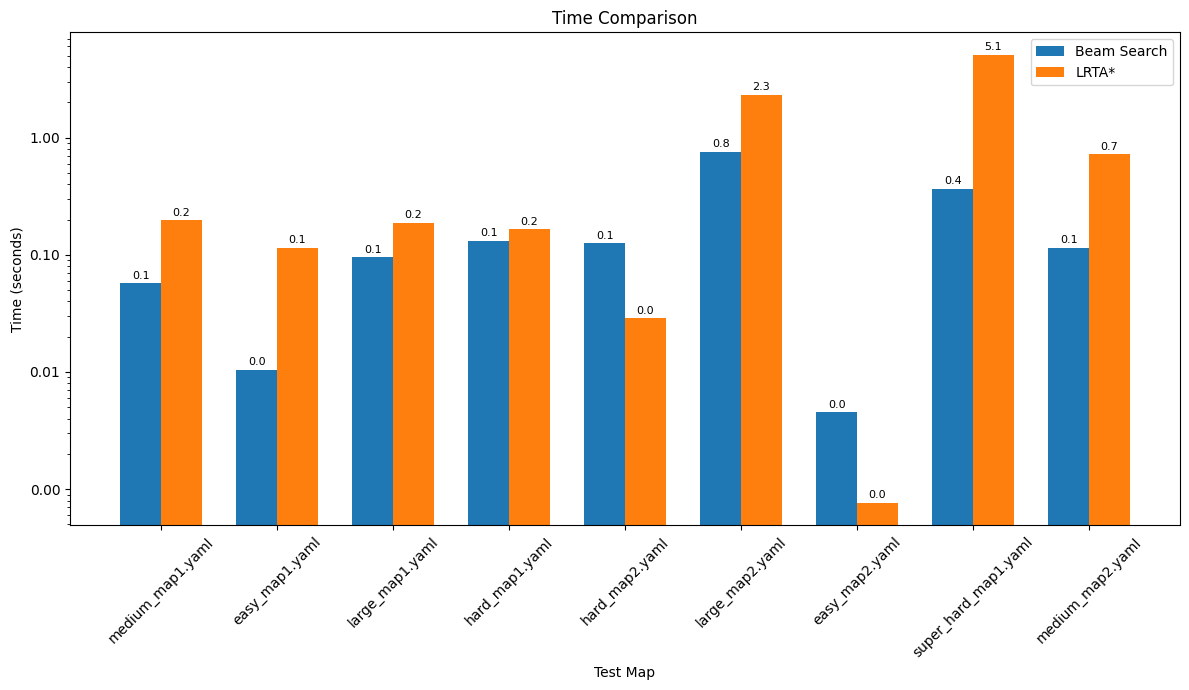

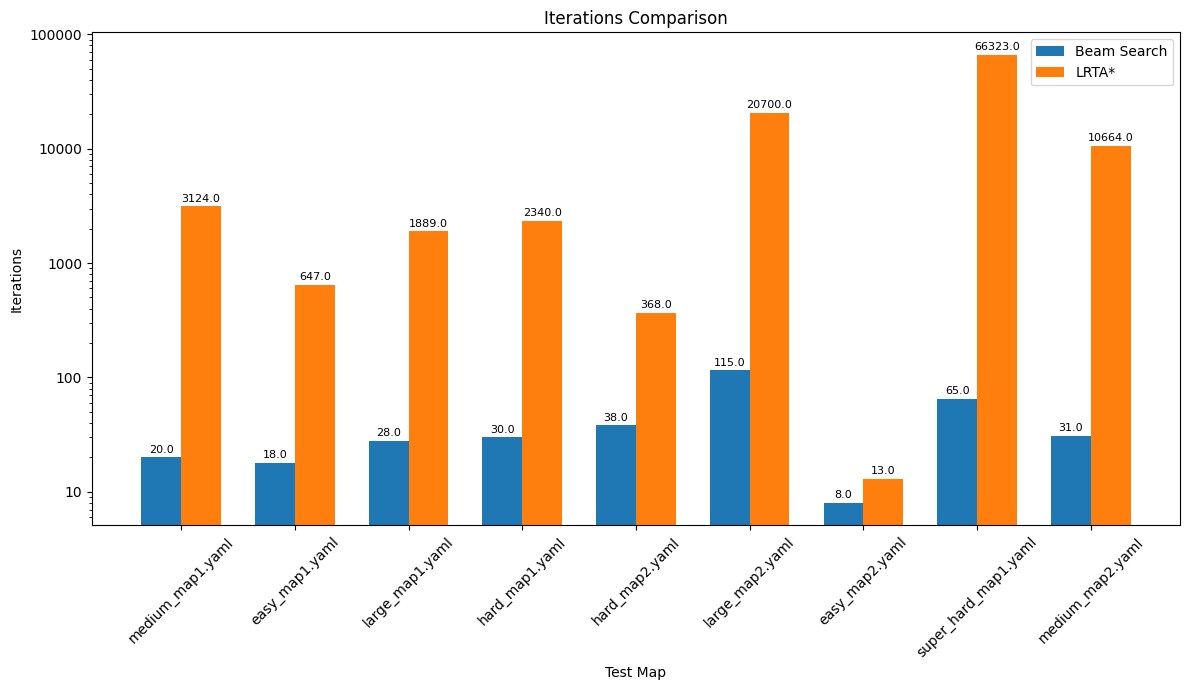

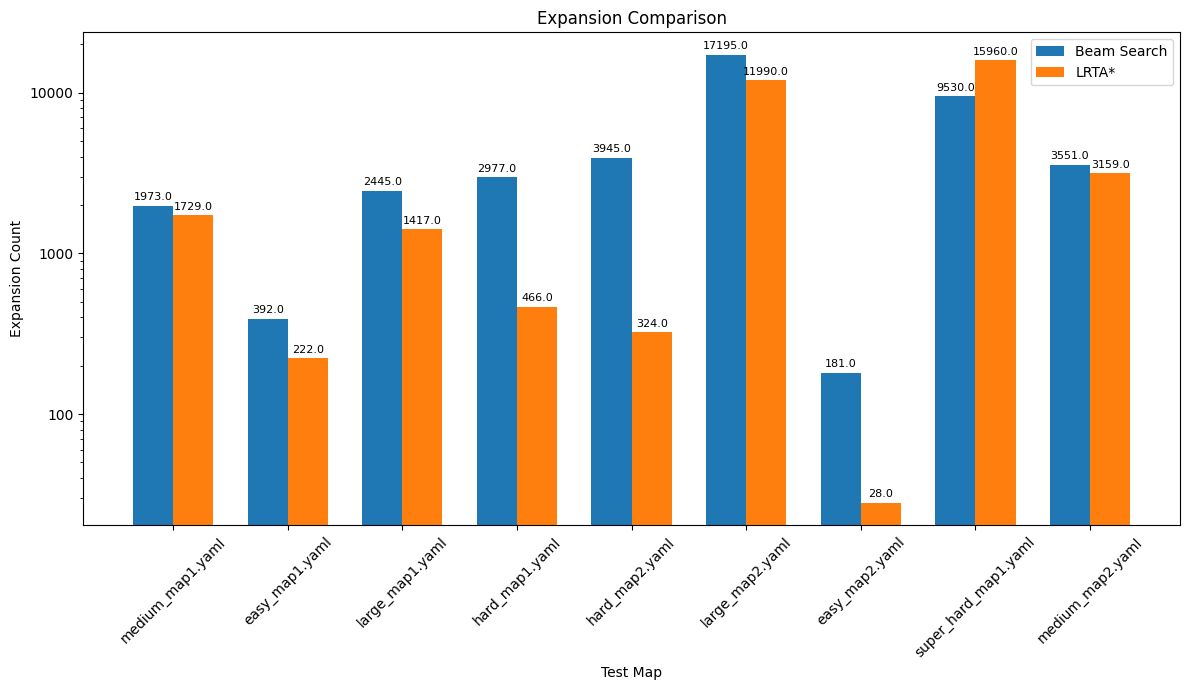

In [34]:
run_all_tests_and_plot()

# Visualizing a map 

In [35]:
print(map)


/ _ _ _ / 
/ _ B B _ 
/ _ _ _ / 
_ / _ B X 
_ _ P B B 
_ X _ X X 
_ _ _ _ / 
X _ _ _ / 


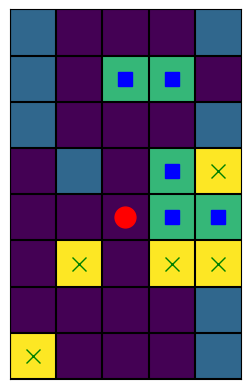

In [36]:
map.plot_map()